# Gradient Descent with multiple variable

In [14]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks/Machine_Learning_Self

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/Machine_Learning_Self


In [49]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

In [137]:
data = genfromtxt("predictive-maintenance-dataset.csv", delimiter=",")
data1 = genfromtxt("Data.csv", delimiter=",")

In [276]:
X1 = data[1:100, 1:4]
y1 = data[1:100, 8]

X = data1[:, 0:3]
y= data1[:, 3]


array([5475.852001, 5475.852001, 5475.704004, 5475.704004, 5475.704004,
       5475.556009, 5475.556009, 5475.556009, 5475.408016, 5475.408016,
       5475.408016, 5475.260025, 5475.260025, 5475.260025, 5475.112036,
       5475.112036, 5475.112036, 5474.964049, 5474.964049, 5474.964049,
       5474.816064, 5474.816064, 5474.816064, 5474.816064, 5474.668081,
       5474.668081, 5474.668081, 5474.5201  , 5474.5201  , 5474.5201  ,
       5474.372121, 5474.372121, 5474.372121, 5474.224144, 5474.224144,
       5474.224144, 5474.076169, 5474.076169, 5474.076169, 5473.928196,
       5473.928196, 5473.928196, 5473.780225, 5473.780225, 5473.780225,
       5473.632256, 5473.632256, 5473.632256, 5473.484289, 5473.484289,
       5473.484289, 5473.336324, 5473.336324, 5473.336324, 5473.188361,
       5473.188361, 5473.188361, 5473.0404  , 5473.0404  , 5473.0404  ,
       5472.892441, 5472.892441, 5472.892441, 5472.744484, 5472.744484,
       5472.744484, 5472.596529, 5472.596529, 5472.596529, 5472.

In [202]:
# Multivariate Linear Regression using Gradient Descent
def LinReg_with_gradient_descent(X, y, alpha, epoch):
  m = X.shape[0]  # number of samples
  ones =np.ones((m,1))  
  X = np.concatenate((ones, X), axis=1)   # Nuw X with X0's =1
  n = X.shape[1]   # 
  Theta = np.ones(n)    # n= 4  parameter initialization
  h = np.dot(X, Theta)   # Compute hypothesis

  # Gradient descent algorithm
  cost = np.ones(epoch)
  for i in range (0, epoch):
    Theta[0] = Theta[0] - (alpha / X.shape[0]) * sum(h-y)
    for j in range(1, n):
      Theta[j]= Theta[j] - (alpha/ X.shape[0]) * sum((h-y) * X[:, j])
    h  = np.dot(X, Theta)
    cost[i] = 1/(2*m) * sum(np.square(h-y))  # Compute Cost
  return cost, Theta


In [236]:
cost, theta = LinReg_with_gradient_descent(X, y, 0.01, 10000)
print(theta)

[ 5.31560519 -2.00442273  0.5329184  -0.26583008]


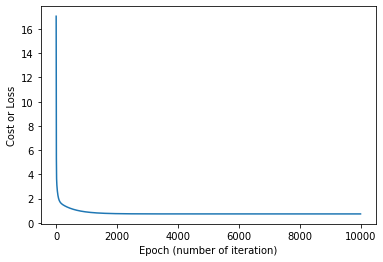

Lowest cost =0.7376348973740224
 Cost after 1000 iterations = 0.7376348973740224


In [237]:
# Checking out the loss or cost plot
plt.plot(cost)
plt.xlabel("Epoch (number of iteration)")
plt.ylabel( "Cost or Loss")
plt.show()
print("Lowest cost =" + str(np.min(cost)))
print(" Cost after 1000 iterations = " + str(cost[-1]))


In [ ]:
#Predictions for the new values using the model
X_predict_1=np.array([1,1,1])
X_predict_2=np.array([2,0,4])
X_predict_3=np.array([3,2,1])
# print(lm.coef_)
print(theta)
#Predictions
X_predict_1 = np.concatenate(([1], X_predict_1), axis = 0) # Adding one colum of one in the beggining
y_predict_1=np.dot(theta, X_predict_1)
print("Prediction for (1,1,1) = " + str(y_predict_1))

X_predict_2 = np.concatenate(([1], X_predict_2), axis = 0) # Adding one colum of one in the beggining
y_predict_2=np.dot(theta, X_predict_2)
print("Prediction for (2,0,4) = " + str(y_predict_2))

X_predict_3 = np.concatenate(([1], X_predict_3), axis = 0) # Adding one colum of one in the beggining
y_predict_3=np.dot(theta, X_predict_3)
print("Prediction for (3,2,1) = " + str(y_predict_3))

Validating the model using Built-in Linear Regression Function

In [ ]:
from sklearn import linear_model  # Importing linear model
lm = linear_model.LinearRegression()   # Linear regression
lm.fit(X, y)           # Fitting the data
# Printing the thetas (intercept and coefs)
print(lm.coef_)
# print(lm.coef_)

In [ ]:
on()   # Linear regression
lm.fit(X, y)           # Fitting the data
# Printing the thetas (intercept and coefs)
print(lm.coef_)
# print(lm.coef_)

In [209]:
# print(lm.coef_)
print(lm.coef_)


#Predictions
X_predict_1=np.array([[1,1,1]])
X_predict_2=np.array([[2,0,4]])
X_predict_3=np.array([[3,2,1]])
print("Prediction for (1,1,1) = " + str(lm.predict(X_predict_1)))
print("Prediction for (2,0,4) = " + str(lm.predict(X_predict_2)))
print("Prediction for (3,2,1) = " + str(lm.predict(X_predict_3)))

[-2.00445363  0.53288229 -0.26586212]
Prediction for (1,1,1) = [3.57839035]
Prediction for (2,0,4) = [0.24346807]
Prediction for (3,2,1) = [0.10236538]


In [275]:
cost1, theta1 = LinReg_with_gradient_descent(X1, y1, 0.00015, 1000)
print(theta1)
lm.fit(X1, y1) 
print(lm.coef_)

X_test = data[101:102,1:4]
ones =np.ones((1,1))
X = np.concatenate((ones, X_test), axis=1)
# X_test
# y_predict_1= np.dot(X_predict_1, theta)
# y_predict_1
y_predict_1= np.dot(X, theta)
y_predict_1

[-3.21676597e+72 -3.00944732e+74 -2.37986116e+74 -5.80463191e+73]
[7.89226521e-04 1.47957362e+02 2.37315996e-04]


array([-147.1803912])

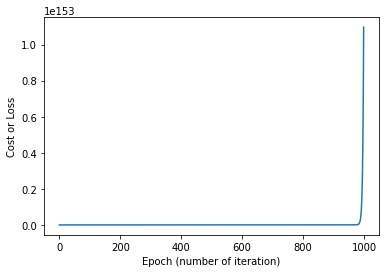

Lowest cost =19555435.07813171
 Cost after 1000 iterations = 0.7376348973740224


In [245]:
# Checking out the loss or cost plot
plt.plot(cost1)
plt.xlabel("Epoch (number of iteration)")
plt.ylabel( "Cost or Loss")
plt.show()
print("Lowest cost =" + str(np.min(cost)))
print(" Cost after 1000 iterations = " + str(cost[-1]))